<a href="https://colab.research.google.com/github/ashritakodali/coffee_quality_analysis/blob/Maggie/ML_Project_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/cleaned_data/FINAL_DATA.csv')

In [3]:
df['Country.of.Origin'] = df['Country.of.Origin'].replace('Tanzania, United Republic Of', 'Tanzania')
display(df)

,Country.of.Origin,Number.of.Bags,Bag.Weight,Harvest.Year,Grading.Date,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,...,Clean.Cup,Sweetness,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,Expiration,Altitude,Species
0,Thailand,1,10,2020,2024-10-29,Washed/Wet,8.67,8.50,8.33,8.00,...,10.0,10.00,0.112,0,0,NaN,0,2025-10-29,1443.0,Arabica
1,Thailand,1,8,2025,2025-07-08,Natural/Dry,8.25,8.50,8.33,8.25,...,10.0,10.00,0.111,0,0,Green,0,2026-07-08,1450.0,Arabica
2,Thailand,1,7,2025,2025-10-02,Natural/Dry,8.42,8.42,8.17,8.17,...,10.0,10.00,0.097,0,0,Green,0,2026-10-02,1375.0,Arabica
3,Thailand,1,8,2025,2025-08-26,Natural/Dry,8.25,8.33,8.25,8.17,...,10.0,10.00,0.129,0,0,Yellow,0,2026-08-26,1200.0,Arabica
4,Thailand,1,7,2021,2025-10-02,Washed/Wet,8.33,8.25,8.08,8.08,...,10.0,10.00,0.095,0,0,Green,3,2026-10-02,1200.0,Arabica
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,Vietnam,15,30,2025,2025-04-07,Natural/Dry,7.42,7.25,7.17,7.50,...,10.0,7.67,0.123,0,0,Green,0,2026-04-07,550.0,Robusta
398,Brazil,1,60,2024,2024-11-20,Washed/Wet,7.25,7.25,7.08,7.08,...,10.0,7.08,0.106,0,0,Yellow,2,2025-11-20,200.0,Robusta
399,Brazil,1,60,2024,2024-11-20,Natural/Dry,7.00,7.17,7.17,6.92,...,10.0,7.08,0.106,0,0,Brown,2,2025-11-20,232.0,Robusta
400,India,5,60,2023,2024-11-20,Washed/Wet,7.25,6.67,6.83,6.67,...,10.0,6.67,0.108,0,0,Yellow,0,2025-11-20,950.0,Robusta


Total number of defective beans: 197


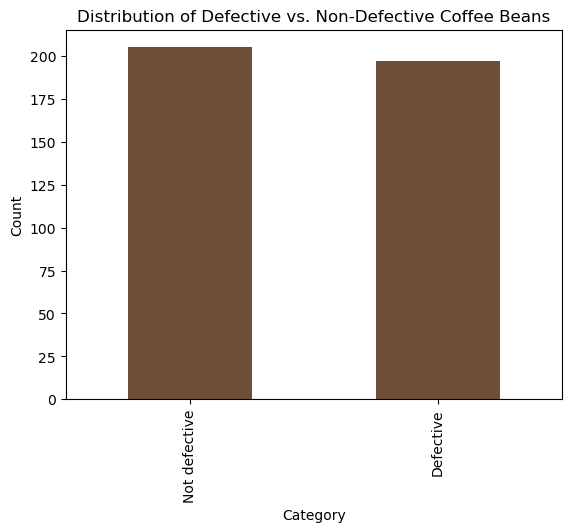

In [4]:
df['Defective'] = np.where(
    (df['Category.One.Defects'] > 0) | (df['Category.Two.Defects'] > 0),
    "Defective",
    "Not defective"
)
print("Total number of defective beans:", (df['Defective'] == "Defective").sum())

df['Defective'].value_counts().plot(kind='bar', color=['#6F4E37'])
plt.title("Distribution of Defective vs. Non-Defective Coffee Beans")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()


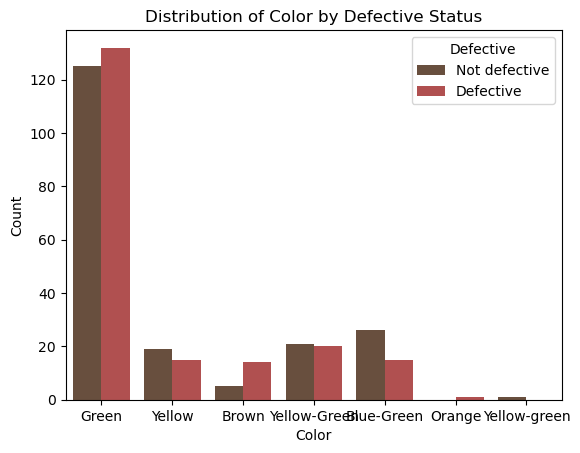

In [5]:
sns.countplot(x='Color', hue='Defective', data=df,
              palette=['#6F4E37', '#C04040'])
plt.title("Distribution of Color by Defective Status")
plt.xlabel("Color")
plt.ylabel("Count")
plt.legend(title="Defective")
plt.show()

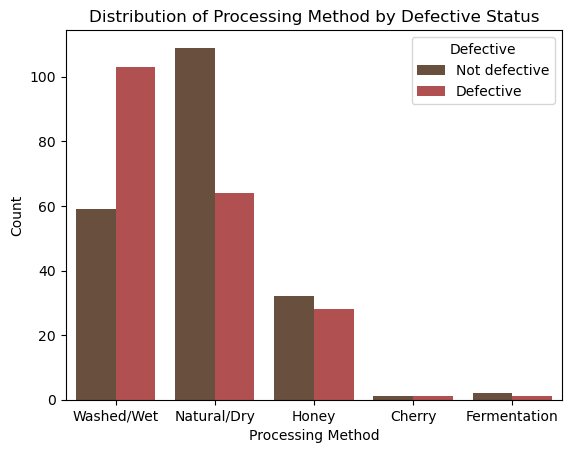

In [6]:
sns.countplot(x='Processing.Method', hue='Defective', data=df,
              palette=['#6F4E37', '#C04040'])
plt.title("Distribution of Processing Method by Defective Status")
plt.xlabel("Processing Method")
plt.ylabel("Count")
plt.legend(title="Defective")
plt.show()

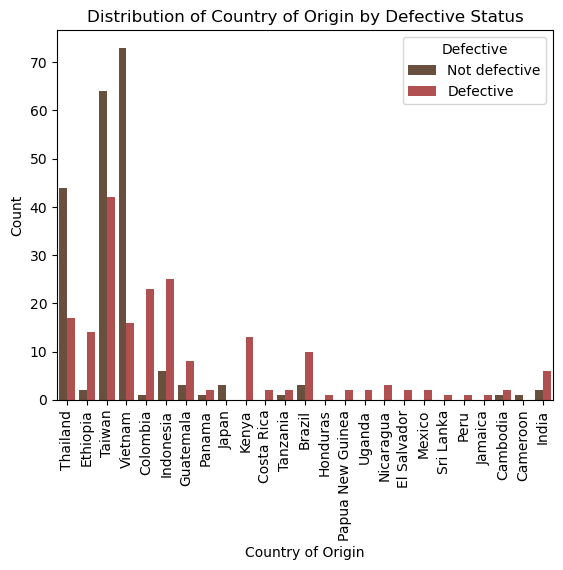

In [7]:
sns.countplot(x='Country.of.Origin', hue='Defective', data=df,
              palette=['#6F4E37', '#C04040'])
plt.title("Distribution of Country of Origin by Defective Status")
plt.xlabel("Country of Origin")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.legend(title="Defective")
plt.show()

In [8]:
defective = df[df['Defective']=='Defective']

In [9]:
defective.columns

Index(['Country.of.Origin', 'Number.of.Bags', 'Bag.Weight', 'Harvest.Year',
       'Grading.Date', 'Processing.Method', 'Aroma', 'Flavor', 'Aftertaste',
       'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness',
       'Moisture', 'Category.One.Defects', 'Quakers', 'Color',
       'Category.Two.Defects', 'Expiration', 'Altitude', 'Species',
       'Defective'],
      dtype='object')

In [10]:
defective_num = defective[['Number.of.Bags', 'Bag.Weight',
                               'Harvest.Year', 'Aroma', 'Flavor',
                               'Aftertaste', 'Acidity', 'Body',
                               'Balance', 'Uniformity', 'Clean.Cup',
                               'Sweetness','Moisture', 'Altitude']]

<Axes: >

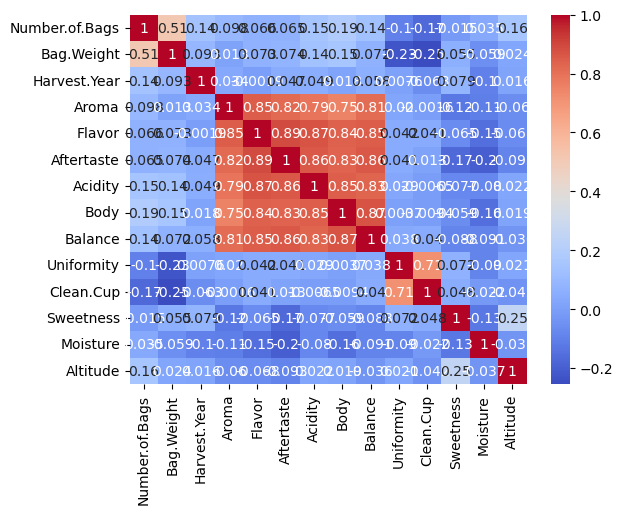

In [11]:
sns.heatmap(defective_num.corr(), annot=True, cmap='coolwarm')

Decided to not do defective and instead include it as a feature for clustering. In the shiny app I will include species as a filter option and instead cluster by species!

In [12]:
df.columns

Index(['Country.of.Origin', 'Number.of.Bags', 'Bag.Weight', 'Harvest.Year',
       'Grading.Date', 'Processing.Method', 'Aroma', 'Flavor', 'Aftertaste',
       'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness',
       'Moisture', 'Category.One.Defects', 'Quakers', 'Color',
       'Category.Two.Defects', 'Expiration', 'Altitude', 'Species',
       'Defective'],
      dtype='object')

In [13]:
df = df[['Number.of.Bags', 'Bag.Weight', 'Harvest.Year',
       'Aroma', 'Flavor', 'Aftertaste',
       'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness',
       'Moisture', 'Category.One.Defects',
       'Category.Two.Defects', 'Expiration', 'Altitude', 'Species']]

Features: Taste (flavor, aftertaste, acidity, body, balance), aroma, quality control (uniformity, cup cleanliness), sweetness, moisture, total defects, age (2025-harvest year), farm altitude

In [14]:
df['Taste'] = df[['Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance']].mean(axis=1)
df['Quality Control'] = df[['Uniformity', 'Clean.Cup']].mean(axis=1)
df['Age'] = 2025 - df['Harvest.Year']
df['Total Defects'] = df['Category.One.Defects'] + df['Category.Two.Defects']
df2 = df[['Species', 'Taste', 'Aroma', 'Quality Control', 'Sweetness', 'Moisture',
          'Total Defects', 'Age', 'Altitude']]

/var/folders/k2/xkhh4x_x2999dprlhrz1h_r00000gn/T/ipykernel_59339/4101008075.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Taste'] = df[['Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance']].mean(axis=1)
/var/folders/k2/xkhh4x_x2999dprlhrz1h_r00000gn/T/ipykernel_59339/4101008075.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quality Control'] = df[['Uniformity', 'Clean.Cup']].mean(axis=1)
/var/folders/k2/xkhh4x_x2999dprlhrz1h_r00000gn/T/ipykernel_59339/4101008075.py:3: SettingWithCopyWarn

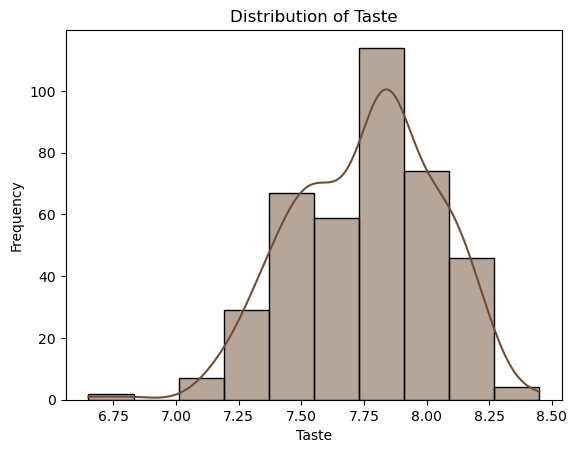

In [15]:
sns.histplot(df['Taste'], bins=10, kde=True, color='#6F4E37')
plt.title('Distribution of Taste')
plt.xlabel('Taste')
plt.ylabel('Frequency')
plt.show()

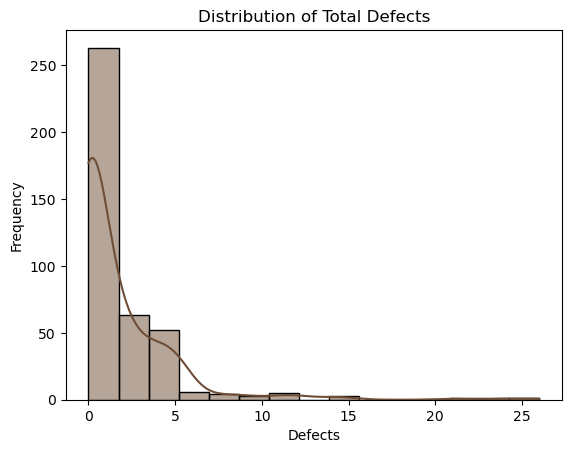

In [16]:
sns.histplot(df['Total Defects'], bins=15, kde=True, color='#6F4E37')
plt.title('Distribution of Total Defects')
plt.xlabel('Defects')
plt.ylabel('Frequency')
plt.show()

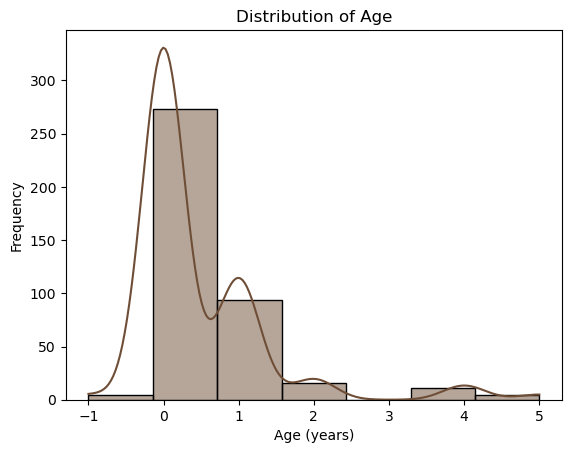

In [17]:
sns.histplot(df['Age'], bins=7, kde=True, color='#6F4E37')
plt.title('Distribution of Age')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.show()

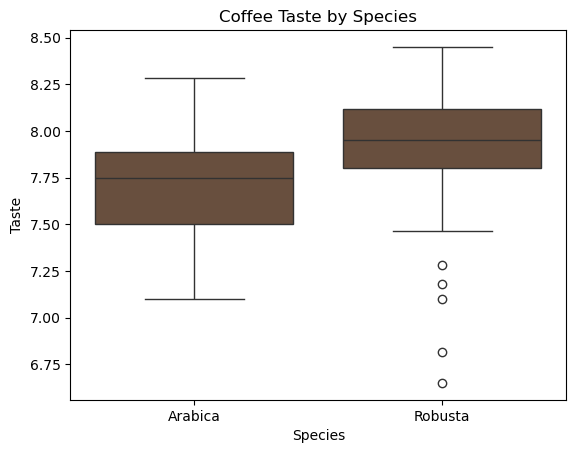

In [18]:
sns.boxplot(x=df['Species'], y=df['Taste'], color='#6F4E37')
plt.xlabel('Species')
plt.ylabel('Taste')
plt.title(f'Coffee Taste by Species')
plt.show()

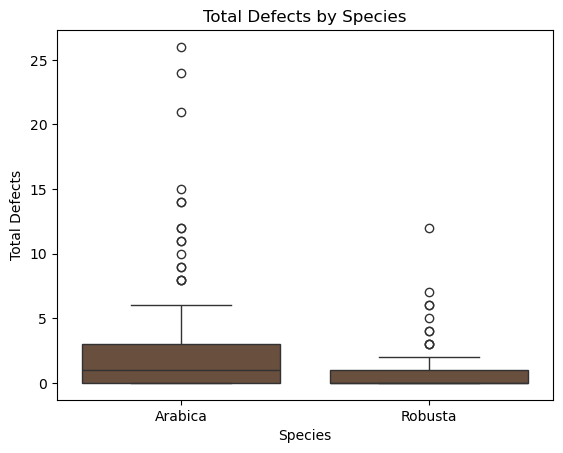

In [19]:
sns.boxplot(x=df['Species'], y=df['Total Defects'], color='#6F4E37')
plt.xlabel('Species')
plt.ylabel('Total Defects')
plt.title(f'Total Defects by Species')
plt.show()

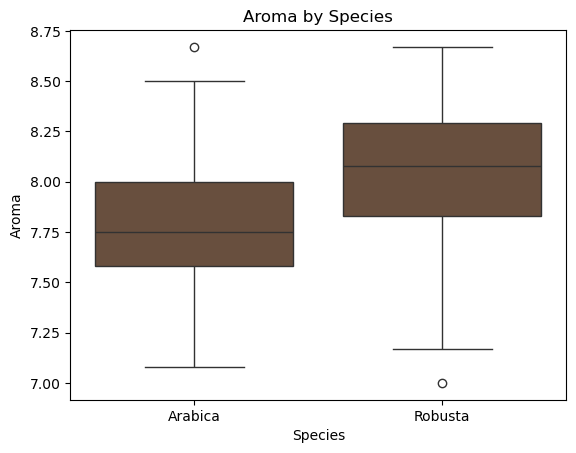

In [20]:
sns.boxplot(x=df['Species'], y=df['Aroma'], color='#6F4E37')
plt.xlabel('Species')
plt.ylabel('Aroma')
plt.title(f'Aroma by Species')
plt.show()

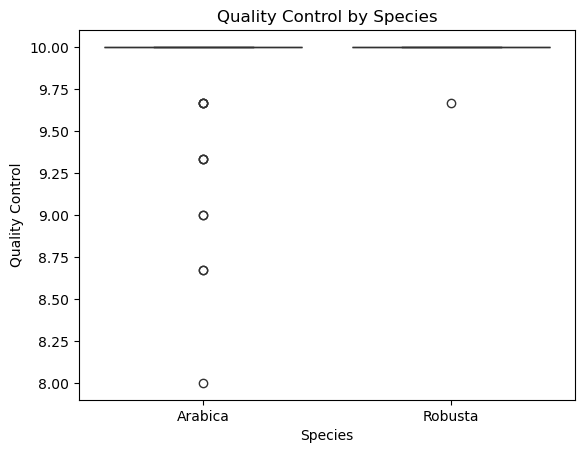

In [21]:
sns.boxplot(x=df['Species'], y=df['Quality Control'], color='#6F4E37')
plt.xlabel('Species')
plt.ylabel('Quality Control')
plt.title(f'Quality Control by Species')
plt.show()

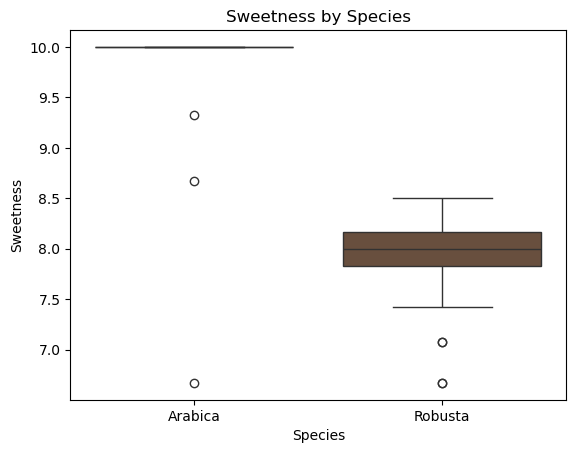

In [22]:
sns.boxplot(x=df['Species'], y=df['Sweetness'], color='#6F4E37')
plt.xlabel('Species')
plt.ylabel('Sweetness')
plt.title(f'Sweetness by Species')
plt.show()

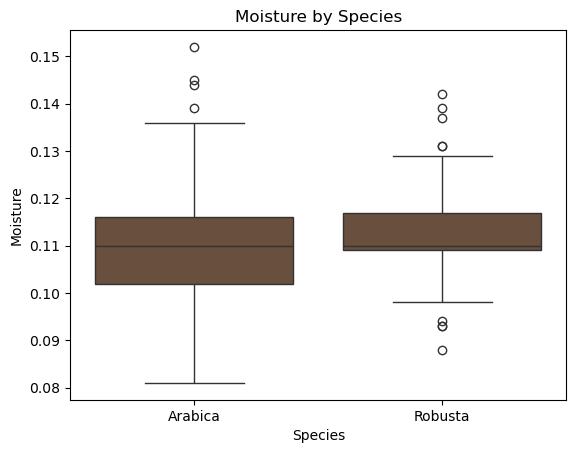

In [23]:
sns.boxplot(x=df['Species'], y=df['Moisture'], color='#6F4E37')
plt.xlabel('Species')
plt.ylabel('Moisture')
plt.title(f'Moisture by Species')
plt.show()

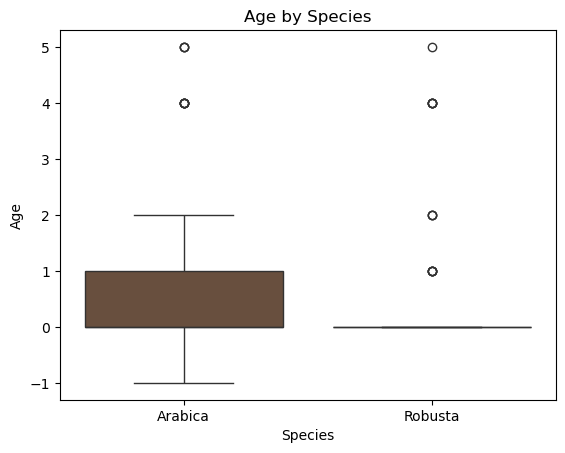

In [24]:
sns.boxplot(x=df['Species'], y=df['Age'], color='#6F4E37')
plt.xlabel('Species')
plt.ylabel('Age')
plt.title(f'Age by Species')
plt.show()

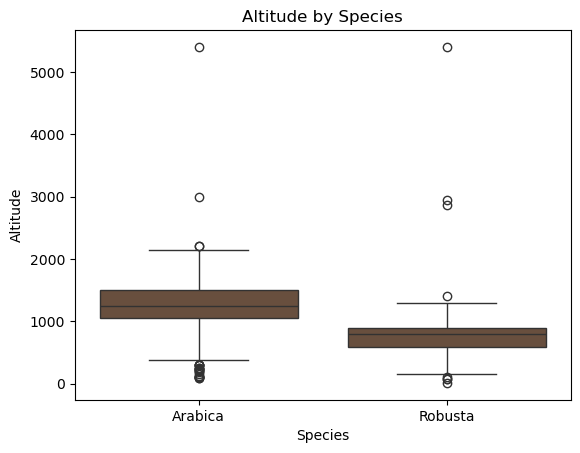

In [25]:
sns.boxplot(x=df['Species'], y=df['Altitude'], color='#6F4E37')
plt.xlabel('Species')
plt.ylabel('Altitude')
plt.title(f'Altitude by Species')
plt.show()

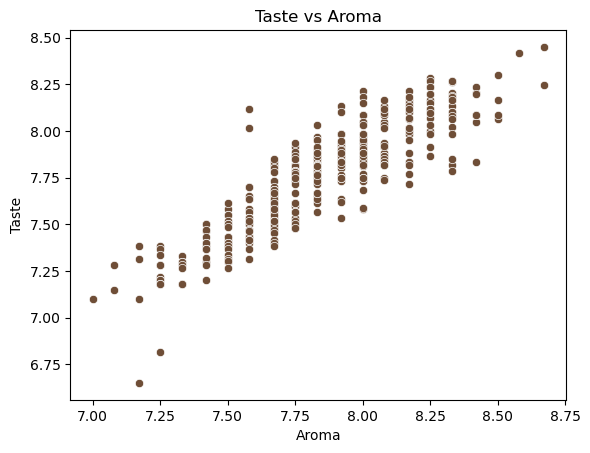

In [26]:
sns.scatterplot(x=df['Aroma'], y=df['Taste'], color='#6F4E37')
plt.xlabel('Aroma')
plt.ylabel('Taste')
plt.title(f'Taste vs Aroma')
plt.show()

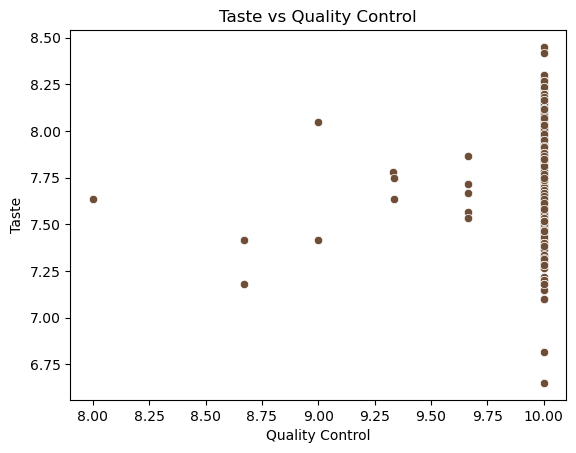

In [27]:
sns.scatterplot(x=df['Quality Control'], y=df['Taste'], color='#6F4E37')
plt.xlabel('Quality Control')
plt.ylabel('Taste')
plt.title(f'Taste vs Quality Control')
plt.show()

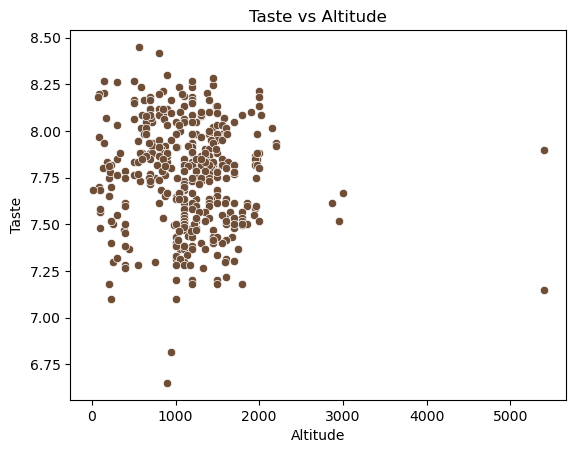

In [28]:
sns.scatterplot(x=df['Altitude'], y=df['Taste'], color='#6F4E37')
plt.xlabel('Altitude')
plt.ylabel('Taste')
plt.title(f'Taste vs Altitude')
plt.show()

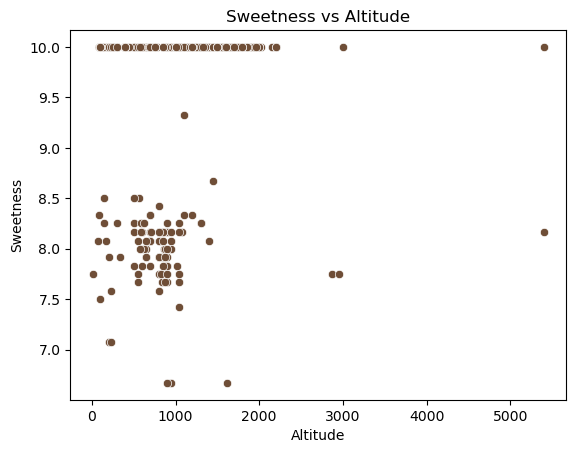

In [29]:
sns.scatterplot(x=df['Altitude'], y=df['Sweetness'], color='#6F4E37')
plt.xlabel('Altitude')
plt.ylabel('Sweetness')
plt.title(f'Sweetness vs Altitude')
plt.show()

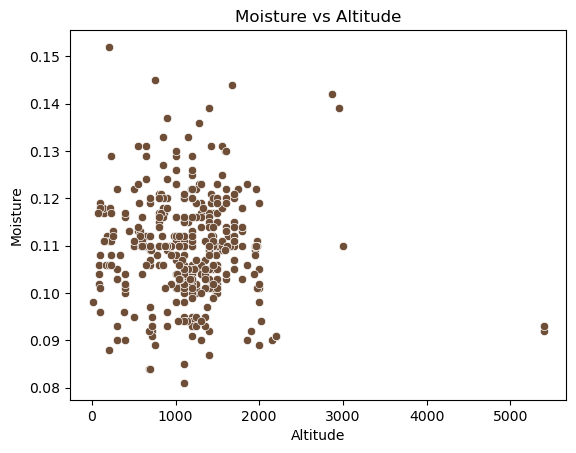

In [30]:
sns.scatterplot(x=df['Altitude'], y=df['Moisture'], color='#6F4E37')
plt.xlabel('Altitude')
plt.ylabel('Moisture')
plt.title(f'Moisture vs Altitude')
plt.show()

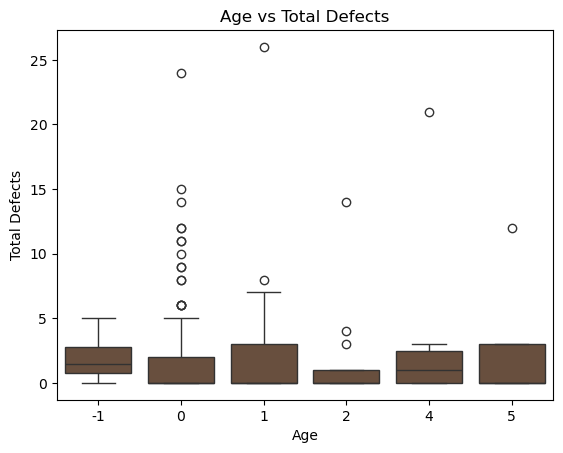

In [31]:
sns.boxplot(x=df['Age'], y=df['Total Defects'], color='#6F4E37')
plt.xlabel('Age')
plt.ylabel('Total Defects')
plt.title(f'Age vs Total Defects')
plt.show()

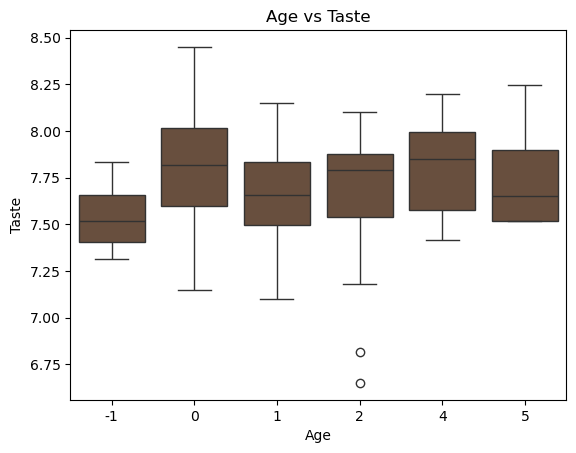

In [32]:
sns.boxplot(x=df['Age'], y=df['Taste'], color='#6F4E37')
plt.xlabel('Age')
plt.ylabel('Taste')
plt.title(f'Age vs Taste')
plt.show()

In [33]:
# standardizing
from sklearn.preprocessing import StandardScaler
num_cols = df2.select_dtypes(include='number').columns
scaler = StandardScaler()
df2[num_cols] = scaler.fit_transform(df2[num_cols])


/var/folders/k2/xkhh4x_x2999dprlhrz1h_r00000gn/T/ipykernel_59339/29178455.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[num_cols] = scaler.fit_transform(df2[num_cols])


In [34]:
display(df2)

,Species,Taste,Aroma,Quality Control,Sweetness,Moisture,Total Defects,Age,Altitude
0,Arabica,1.731353,2.666965,0.154254,0.539849,0.221277,-0.564245,4.849281,0.504869
1,Arabica,1.858351,1.309197,0.154254,0.539849,0.126140,-0.564245,-0.494499,0.516829
2,Arabica,1.569078,1.858770,0.154254,0.539849,-1.205785,-0.564245,-0.494499,0.388686
3,Arabica,1.681965,1.309197,0.154254,0.539849,1.838614,-0.564245,-0.494499,0.089685
4,Arabica,1.498524,1.567819,0.154254,0.539849,-1.396059,0.391484,3.780525,0.089685
...,...,...,...,...,...,...,...,...,...
397,Robusta,-1.669364,-1.374013,0.154254,-2.113812,1.267790,-0.564245,-0.494499,-1.020889
398,Robusta,-2.029191,-1.923586,0.154254,-2.785768,-0.349547,0.072908,0.574257,-1.618891
399,Robusta,-2.311408,-2.731782,0.154254,-2.785768,-0.349547,0.072908,0.574257,-1.564216
400,Robusta,-3.313279,-1.923586,0.154254,-3.252722,-0.159272,-0.564245,1.643013,-0.337459


# Clustering

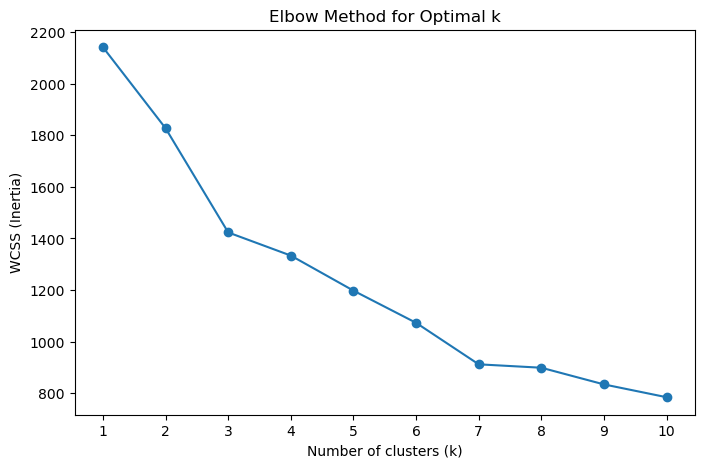

In [35]:
### Clustering - Species: Arabica
arabica = df2[df2['Species']=='Arabica'].drop('Species', axis=1)

# choosing optimal k - for shiny app, this will just be a choice
from sklearn.cluster import KMeans
wcss = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(arabica)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(8,5))
plt.plot(K, wcss, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.xticks(K)
plt.show()

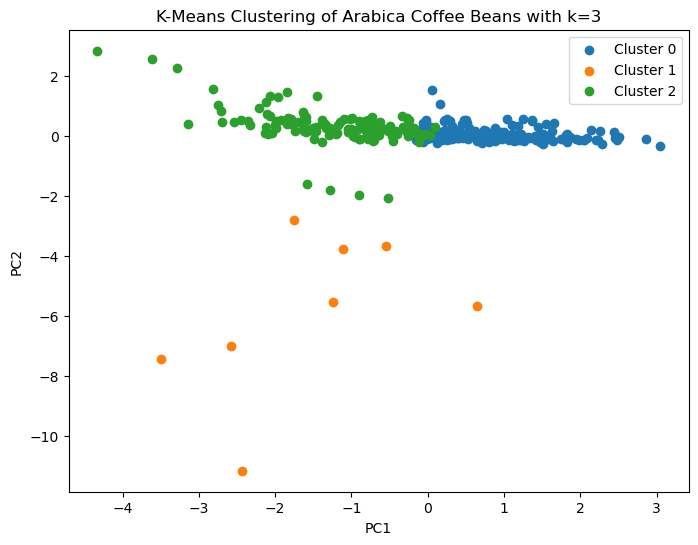

In [36]:
# proceeding with k=3 based on elbow graph
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(arabica)
df_clusters = arabica.copy()
df_clusters['cluster'] = labels

# cluster plots
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
components = pca.fit_transform(arabica)
df_clusters['PC1'] = components[:,0]
df_clusters['PC2'] = components[:,1]
plt.figure(figsize=(8,6))
for cluster in range(k):
    plt.scatter(
        df_clusters[df_clusters['cluster'] == cluster]['PC1'],
        df_clusters[df_clusters['cluster'] == cluster]['PC2'],
        label=f'Cluster {cluster}'
    )
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means Clustering of Arabica Coffee Beans with k=3')
plt.legend()
plt.show()

In [37]:
# centroids of clusters
centroids_scaled = kmeans.cluster_centers_
centroids_original = scaler.inverse_transform(centroids_scaled)
centroids_df = pd.DataFrame(centroids_original, columns=arabica.columns)
centroids_df['Cluster'] = range(k)
cols = ['Cluster'] + [c for c in arabica.columns]
centroids_df = centroids_df[cols]
display(centroids_df)

,Cluster,Taste,Aroma,Quality Control,Sweetness,Moisture,Total Defects,Age,Altitude
0,0,7.887040,7.969429,10.000000,9.980971,0.104926,1.085714,0.542857,1200.964571
1,1,7.608250,7.717500,8.917500,9.750000,0.111250,2.000000,0.500000,1329.250000
2,2,7.472937,7.554062,9.989531,10.000000,0.113977,3.375000,0.398437,1294.505781


**Interpretation:**

*Cluster 0 (blue):* high taste, high aroma, high quality control, medium sweetness, low moisture, low defects, high age, low altitude

*Cluster 1 (orange):* medium taste, medium aroma, low quality control, low sweetness, medium moisture, medium defects, medium age, high altitude

*Cluster 2 (green):* low taste, low aroma, medium quality control, high sweetness, high moisture, high defects, low age, medium altitude

In [38]:
centroids_df_scaled = pd.DataFrame(centroids_scaled, columns=arabica.columns)
feature_importance = centroids_df_scaled.max() - centroids_df_scaled.min()
feature_importance = feature_importance.sort_values(ascending=False)
print(feature_importance)

Quality Control    6.495027
Taste              1.460836
Aroma              1.342788
Moisture           0.861075
Total Defects      0.729312
Sweetness          0.284728
Altitude           0.219185
Age                0.154349
dtype: float64


Quality Control (Uniformity, Cup Cleanliness) has the highest impact on clustering arabica coffee beans.

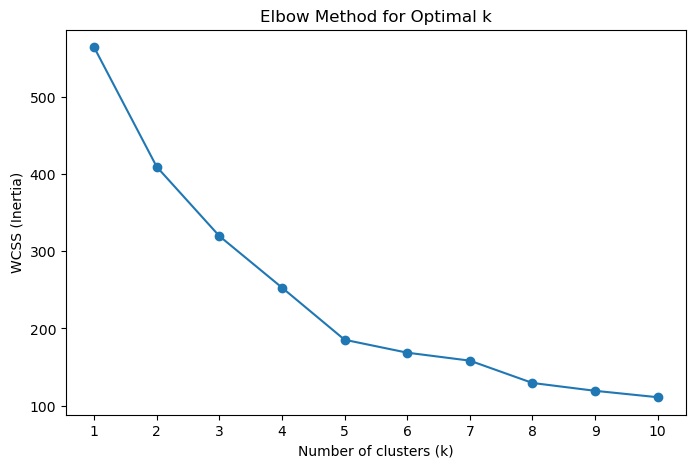

In [39]:
### Clustering - Species: Robusta
robusta = df2[df2['Species']=='Robusta'].drop('Species', axis=1)

# choosing optimal k - for shiny app, this will just be a choice
wcss = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(robusta)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(8,5))
plt.plot(K, wcss, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.xticks(K)
plt.show()

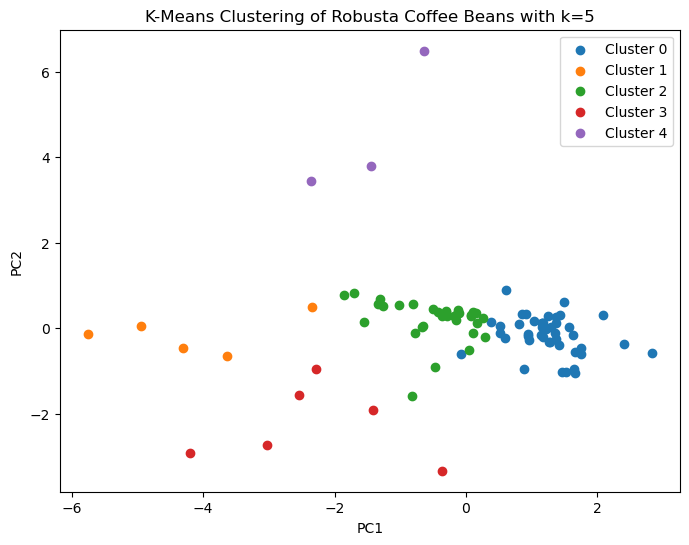

In [40]:
# proceeding with k=5 based on elbow graph
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(robusta)
df_clusters = robusta.copy()
df_clusters['cluster'] = labels
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
components = pca.fit_transform(robusta)
df_clusters['PC1'] = components[:,0]
df_clusters['PC2'] = components[:,1]
plt.figure(figsize=(8,6))
for cluster in range(k):
    plt.scatter(
        df_clusters[df_clusters['cluster'] == cluster]['PC1'],
        df_clusters[df_clusters['cluster'] == cluster]['PC2'],
        label=f'Cluster {cluster}')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means Clustering of Robusta Coffee Beans with k=5')
plt.legend()
plt.show()

In [41]:
# centroids of clusters
centroids_scaled = kmeans.cluster_centers_
centroids_original = scaler.inverse_transform(centroids_scaled)
centroids_df = pd.DataFrame(centroids_original, columns=robusta.columns)
centroids_df['Cluster'] = range(k)
cols = ['Cluster'] + [c for c in robusta.columns]
centroids_df = centroids_df[cols]
display(centroids_df)

,Cluster,Taste,Aroma,Quality Control,Sweetness,Moisture,Total Defects,Age,Altitude
0,0,8.132727,8.302727,10.000000,8.170909,0.112977,0.272727,0.045455,731.954545
1,1,7.007200,7.218000,10.000000,7.034000,0.107200,1.600000,1.200000,566.400000
2,2,7.818364,7.835152,9.989848,7.856364,0.111758,0.909091,0.060606,758.454545
3,3,7.808333,7.861667,10.000000,7.860000,0.113167,2.333333,4.166667,585.333333
4,4,7.678000,7.750000,10.000000,7.890000,0.124667,3.333333,0.333333,3740.000000


**Interpretation:**

*Cluster 0 (blue):* high taste, high aroma, high quality control, high sweetness, medium moisture, low defects, low age, medium altitude

*Cluster 1 (orange):* low taste, low aroma, high quality control, low sweetness, low moisture, medium defects, medium age, low altitude

*Cluster 2 (green):* medium taste, medium aroma, low quality control, medium sweetness, medium moisture, low/medium defects, low age, medium altitude

*Cluster 3 (red):* medium taste, medium aroma, high quality control, medium sweetness, medium moisture, medium/high defects, high age, low altitude

*Cluster 4 (purple):* medium taste, medium aroma, high quality control, medium sweetness, high moisture, high defects, low/medium age, high altitude

In [42]:
centroids_df_scaled = pd.DataFrame(centroids_scaled, columns=robusta.columns)
feature_importance = centroids_df_scaled.max() - centroids_df_scaled.min()
feature_importance = feature_importance.sort_values(ascending=False)
print(feature_importance)

Altitude           5.422337
Age                4.404570
Taste              3.970539
Aroma              3.506687
Moisture           1.661734
Sweetness          1.294837
Total Defects      0.975037
Quality Control    0.060909
dtype: float64


Altitude of the farm has the highest impact on clustering robusta coffee beans.

# Overall interpretation

Arabica and robusta coffee beans differ in what features vary the most and form clear patterns the most. Arabica coffee beans have a clear separation by quality control and taste, while robusta coffee beans have a clear separation by altitude and age. These features impact the clusters formed, which can tell us a lot about the different types of beans that exist within one species. For both species, beans with lower taste and aroma scores tend to be beans with a higher total number of defects. Additionally, the moisture content tends to be higher for beans with a higher total number of defects. Older arabica beans seem to have higher taste and aroma scores, but older robusta beans seem to have lower taste and aroma scores. Altitude seems to have an inverse relationship with quality control based on the arabica clusters, but this relationship doesn't seem as present for robusta beans.